In [1]:
# Auto reload, no need to restart notebook everytime an imported module changes.
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns

import plotting

sns.set()

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Uncomment the following the obtain dataset names and manunually assign short name
# df = pd.read_json("../agg_results/node_results.json")
# sorted(df['Dataset'].unique())
# sorted(df['Perturbation'].unique())

In [3]:
name_dict = {
    'PyG-Actor': 'Actor',
    'PyG-Amazon_Computers': 'Am-Comp',
    'PyG-Amazon_Photo': 'Am-Phot',
    'PyG-CitationFull_CiteSeer': 'CF-CiteSr',
    'PyG-CitationFull_Cora': 'CF-Cora',
    'PyG-CitationFull_Cora_ML': 'CF-CoraML',
    'PyG-CitationFull_DBLP': 'CF-DBLP',
    'PyG-CitationFull_PubMed': 'CF-PubMed',
    'PyG-Coauthor_CS': 'Coau-CS',
    'PyG-Coauthor_Physics': 'Coau-Phy',
    'PyG-DeezerEurope': 'DzEu',
    'PyG-FacebookPagePage': 'FBPP',
    'PyG-Flickr': 'Flickr',
#     'PyG-GemsecDeezer_HR': 'GmDz-HR',
#     'PyG-GemsecDeezer_HU': 'GmDz-HU',
#     'PyG-GemsecDeezer_RO': 'GmDz-RO',
    'PyG-GitHub': 'Github',
    'PyG-LastFMAsia': 'LFMA',
    'PyG-Twitch_DE': 'Twitch-DE',
    'PyG-Twitch_EN': 'Twitch-EN',
    'PyG-Twitch_ES': 'Twitch-ES',
#     'PyG-Twitch_FR': 'Twitch-FR',
    'PyG-Twitch_PT': 'Twitch-PT',
#     'PyG-Twitch_RU': 'Twitch-RU',
    'PyG-WebKB_Cornell': 'WebKB-Cor',
    'PyG-WebKB_Texas': 'WebKB-Tex',
    'PyG-WebKB_Wisconsin': 'WebKB-Wis',
    'PyG-WikiCS': 'WikiCS',
    'PyG-WikipediaNetwork_chameleon': 'WikiNet-cham',
    'PyG-WikipediaNetwork_squirrel': 'WikiNet-squir',
}

pert_dict = {
    'nopert': '-',
    'pert_NoFeatures': 'NoNodeFtrs',
    'pert_NodeDegree': 'NodeDeg',
    'pert_WaveletBankFiltering-lo': 'LowPass',
    'pert_WaveletBankFiltering-mid': 'MidPass',
    'pert_WaveletBankFiltering-hi': 'HighPass',
    'pert_NoEdges': 'NoEdges',
    'pert_Fragmented-k1': 'Frag-k1',
    'pert_Fragmented-k2': 'Frag-k2',
    'pert_Fragmented-k3': 'Frag-k3',
}

trans_cat_dict = {
    'WebKB-Cor': 'T-1',
    'WebKB-Wis': 'T-1',
    'DzEu': 'T-1',
    'Actor': 'T-1',
    'WikiNet-cham': 'T-2',
    'CF-CiteSr': 'T-2',
    'CF-Cora': 'T-2',
    'CF-CoraML': 'T-2',
    'CF-DBLP': 'T-2',
    'CF-PubMed': 'T-2',
    'WikiCS': 'T-2',
    'Coau-CS': 'T-2',
    'Coau-Phy': 'T-2',
    'FBPP': 'T-2',
    'LFMA': 'T-2',
    'Flickr': 'T-2',
    'WikiNet-squir': 'T-3',
    'Github': 'T-3',
    'Am-Comp': 'T-3',
    'Am-Phot': 'T-3',
    'PyG-Twitch_DE': 'T-3',
    'PyG-Twitch_EN': 'T-3',
    'PyG-Twitch_ES': 'T-3',
    'PyG-Twitch_PT': 'T-3',
    'WebKB-Tex': 'T-3'
    }
trans_cat_dict = {k: trans_cat_dict[k] for k in sorted(trans_cat_dict)}

In [4]:
df = pd.read_json("../agg_results/node_gcn_v2_wfb_results.json")

# Only use selected datasets and perturbations
df = df[
    df['Perturbation'].isin(pert_dict)
    & df['Dataset'].isin(name_dict)
]

# Abbreviate selected datasets and perturbations
df['Dataset'] = df['Dataset'].apply(name_dict.get)
df['Perturbation'] = df['Perturbation'].apply(pert_dict.get)

df

,Dataset,Perturbation,Split,score-time_iter,score-accuracy,score-auc,score-precision,score-recall,score-f1,score-macro-f1
0,CF-PubMed,Frag-k2,train,0.0399,0.9379,0.9872,NaN,NaN,NaN,NaN
1,CF-PubMed,Frag-k2,val,0.0326,0.8881,0.9717,NaN,NaN,NaN,NaN
2,CF-PubMed,Frag-k2,test,0.0325,0.8864,0.9707,NaN,NaN,NaN,NaN
3,Coau-CS,Frag-k2,train,0.2963,0.9869,0.9994,NaN,NaN,NaN,NaN
4,Coau-CS,Frag-k2,val,0.2890,0.9435,0.9950,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
982,CF-CiteSr,NoEdges,val,0.0100,0.8146,0.9433,NaN,NaN,NaN,NaN
983,CF-CiteSr,NoEdges,test,0.0098,0.8175,0.9436,NaN,NaN,NaN,NaN
984,WebKB-Cor,NoEdges,train,0.0112,0.9816,1.0000,NaN,NaN,NaN,NaN
985,WebKB-Cor,NoEdges,val,0.0066,0.8424,0.9279,NaN,NaN,NaN,NaN


In [5]:
#######################
split_type = 'test'
score_type = 'auc'
#######################

score_name = f'score-{score_type}'
df = df[df['Split'] == split_type]
df = df[df[score_name].notna()]

datasets = sorted(df['Dataset'].unique())
# perturbations = sorted(df['Perturbation'].unique())
perturbations = list(pert_dict.values())

In [6]:
score_mat = np.zeros((len(datasets), len(perturbations)))
score_mat[:] = np.nan

for dataset, group in df.groupby('Dataset'):
    dataset_idx = datasets.index(dataset)
    
    for perturbation, score in group[['Perturbation', score_name]].values:
        perturbation_idx = perturbations.index(perturbation)
        score_mat[dataset_idx, perturbation_idx] = score * 100

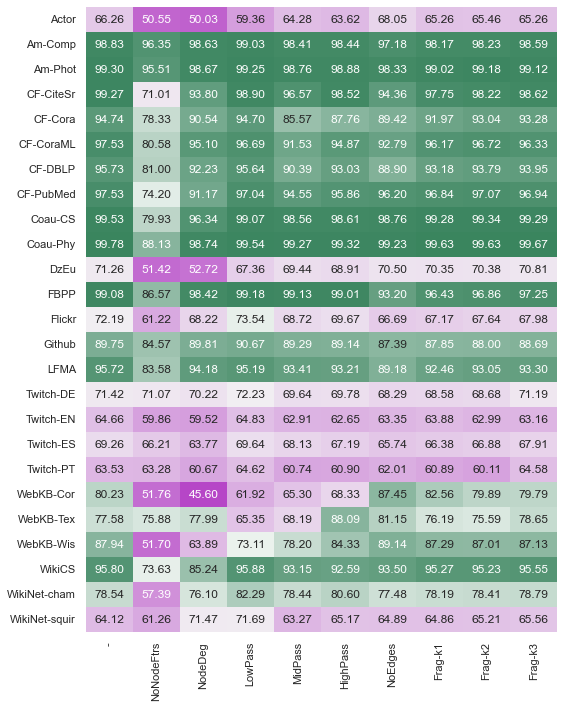

In [7]:
plotting.plot_scores(
    score_mat,
    datasets,
    perturbations,
    figsize=(8, 10),
    save_dir=None,
#     save_dir='outputs/node/gcn_result',
)

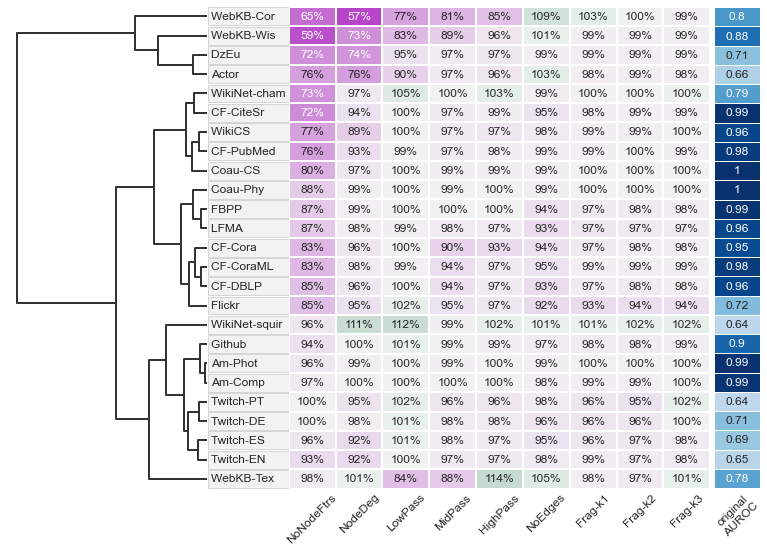

In [8]:
plotting.plot_aurocs(
    score_mat,
    datasets,
    perturbations,
    figsize=(15, 9),
    dendrogram_pos_param=(0.163, 1.9),  # left-shift, width-scale
    score_col_pos=[0.503, 0.051, 0.043, 0.742],  # left-right, up-down, width, height
    # save_dir=None,
    save_dir='outputs/node/gcn_result',
    y_tick_left_shift=0.175,
)

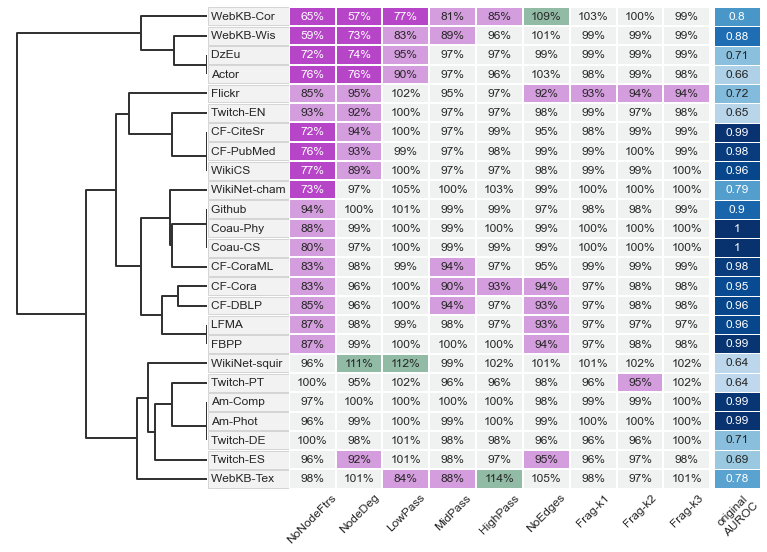

In [9]:
plotting.plot_quantized_aurocs(
    score_mat,
    datasets,
    perturbations,
    figsize=(15, 9),
    dendrogram_pos_param=(0.163, 1.9),  # left-shift, width-scale
    score_col_pos=[0.503, 0.051, 0.043, 0.742],  # left-right, up-down, width, height
    # save_dir=None,
    save_dir='outputs/node/gcn_result',
    y_tick_left_shift=0.175,
)

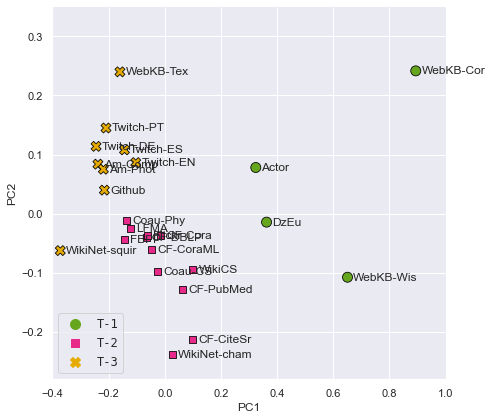

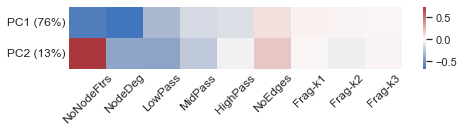

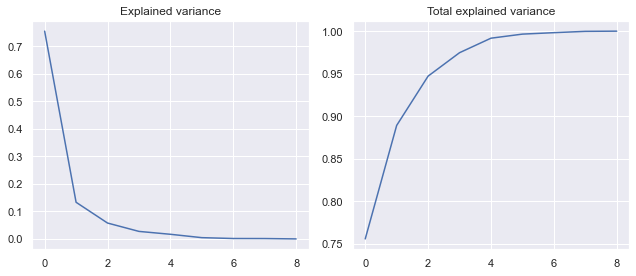

[0.75568222 0.88913611 0.94710368 0.97465347 0.99172133 0.99651519
 0.99821256 0.99976987 1.        ]


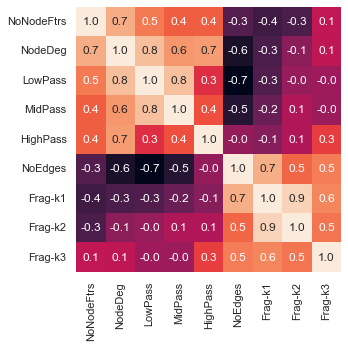

In [10]:
color_labels = list(trans_cat_dict.values())
# cmap = sns.color_palette("Set1", as_cmap=True)
palette_dark2 = sns.color_palette("Dark2", 8)
palette = sns.color_palette([palette_dark2[4], palette_dark2[5], palette_dark2[3]])
plotting.plot_pca(
    score_mat,
    datasets,
    perturbations,
    figsize=(7, 6),
    pca_xlimit=[-.4, 1.], pca_ylimit=[-.28, .35],
    save_dir='outputs/node/gcn_result',
    hue=color_labels,
    style=color_labels,
    palette=palette,
    edgecolor='black',
    s=100)

# Exploring cluster significance

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

In [12]:
mat = (np.log2(score_mat[:, 1:].T / score_mat[:, 0])).T
Z = linkage(mat, 'average')
Z.astype(int)

array([[ 1,  2,  0,  2],
       [11, 14,  0,  2],
       [13, 25,  0,  3],
       [ 5,  6,  0,  2],
       [15, 18,  0,  2],
       [ 7, 22,  0,  2],
       [16, 17,  0,  2],
       [ 4, 28,  0,  3],
       [ 9, 26,  0,  3],
       [ 3, 23,  0,  2],
       [ 8, 30,  0,  3],
       [27, 29,  0,  5],
       [ 0, 10,  0,  2],
       [31, 36,  0,  7],
       [12, 32,  0,  4],
       [34, 35,  0,  5],
       [33, 39,  0,  7],
       [38, 41,  0, 14],
       [40, 42,  0, 19],
       [24, 43,  0, 20],
       [21, 37,  0,  3],
       [20, 44,  0, 21],
       [19, 45,  0,  4],
       [46, 47,  0, 25]])

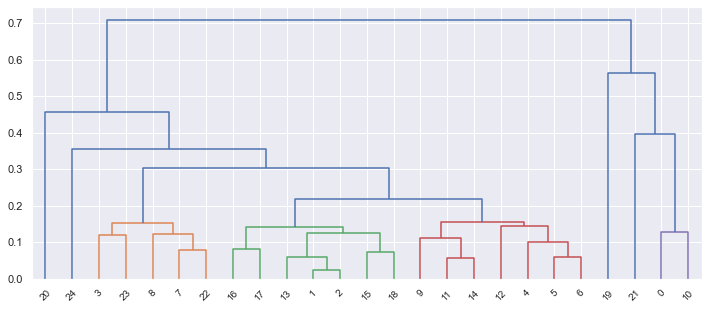

In [13]:
plt.figure(figsize=(12, 5))
dendrogram(Z, color_threshold=0.2)
plt.show()

In [14]:
n = score_mat.shape[0]
cluster_list = [(i,) for i in range(n)]
parent_list = [None] * n
for i, j in enumerate(range(n, 2 * n - 1)):
    x, y = Z[i, 0:2].astype(int)
    cluster_list.append(tuple(cluster_list[x] + cluster_list[y]))
    parent_list.append((x, y))

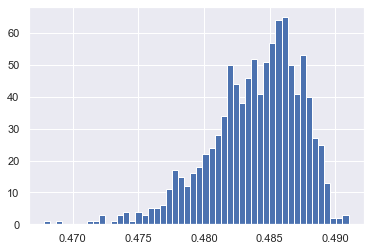

Observed average pairwise distance: 0.39
Perturbation p-val (k=1000) = 0.0


In [15]:
k = 1000
rng = np.random.default_rng()
ary = np.zeros(k)
for i in range(k):
    ary[i] = pdist(rng.permuted(mat, axis=1)).mean()

plt.hist(ary, bins=50)
plt.show()

print(f"Observed average pairwise distance: {pdist(mat).mean():.2f}")
print(f"Perturbation p-val ({k=}) = {sum(ary < pdist(mat).mean()) / k}")